In [190]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
from typing import Dict



In [191]:

data_path = Path("./input/womad - 2024/analysis")
assets_path = data_path / "assets"

In [192]:
target_locations = {}
for x in ["left", "right"]:
    locs = json.loads((assets_path / "alignment" / f"{x}.json").read_text())
    locs = locs.pop("stars")
    # locs.update(**stars)
    target_locations[x] = {k: v for k, v in locs.items() if isinstance(v, dict)}
          

target_locations

{'left': {'bottom_left': {'y': 536.0, 'x': 54.0},
  'top_left': {'y': 53.75, 'x': 57.0},
  'top_right': {'y': 58.75, 'x': 399.0},
  'bottom_right': {'y': 531.5, 'x': 405.25}},
 'right': {'top_left': {'y': 57.75, 'x': 56.0},
  'bottom_left': {'y': 531.75, 'x': 64.0},
  'bottom_right': {'y': 542.75, 'x': 392.0},
  'top_right': {'y': 51.75, 'x': 394.0}}}

In [193]:


def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def to_coordinate(obj):
    return (obj['y'], obj['x'])


def align(image, md):
    md = md.copy()

    stars = md.pop("stars")
    md.update(**stars)

    # overleaf = md.get("overleaf")
    # bottom_right = md.get("bottom_right")
    # if not overleaf or not bottom_right:
    #     target = target_name = "left"
    # else:
    #     bottom_right = md.get("bottom_right")
    #     distance = bottom_right["x"] - overleaf["x"]
    #     target_name = "left" if distance > 100 else "right"

    target_name = "left"
    print("  Using target", target_name)
    target_l = target_locations['left']
    target_r = target_locations['right']


    sources = []
    targets_l = []
    targets_r = []
    for key in md:
        if key in target_l:
            sources.append(to_coordinate(md[key]))
            targets_l.append(to_coordinate(target_l[key]))
            targets_r.append(to_coordinate(target_r[key]))

    sources = np.float32(sources).reshape(-1, 1, 2)
    targets_l = np.float32(targets_l).reshape(-1, 1, 2)
    targets_r = np.float32(targets_r).reshape(-1, 1, 2)

    if len(sources) < 4:
        print("Too few matches")
        return image

    HL, _ = cv2.findHomography(sources, targets_l, cv2.RANSAC, 5.0)
    HR, _ = cv2.findHomography(sources, targets_r, cv2.RANSAC, 5.0)


    w, h = image.shape
    result_image = cv2.warpPerspective(image, H, (650, 450))

    return result_image

def read_image_and_metadata(session_id, image_id):
    image_path = data_path / f"{session_id}/00 - source images/{image_id}.png"
    image = read_image(image_path)

    image_metadata_path = image_path.with_suffix(".json")
    image_metadata_path = image_metadata_path.parent.parent / "10 - locations" / image_metadata_path.name
    image_metadata = json.loads(image_metadata_path.read_text())

    return image, image_metadata

def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')
    plt.show()


  Using target left


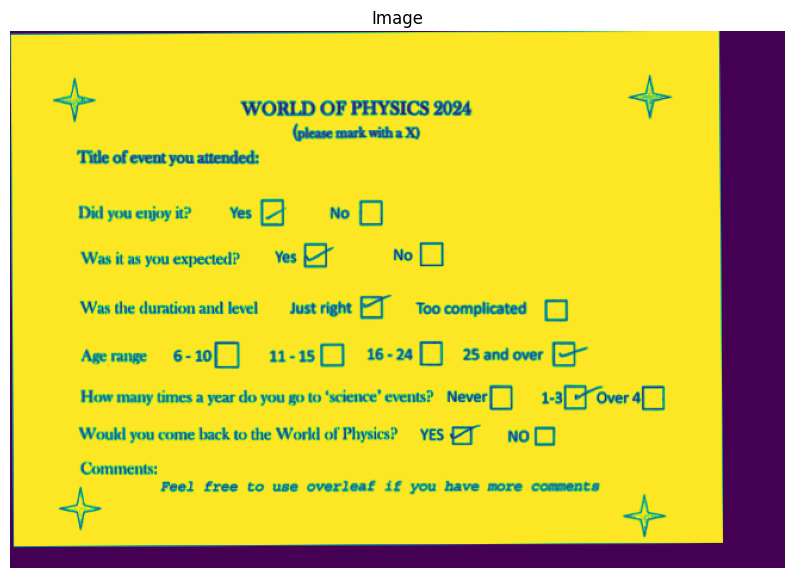

In [194]:

image, md = read_image_and_metadata("003", "006")
if "stars" in md:
    result_image = align(image, md)
    plot_image(result_image)



In [195]:
for session_path in sorted(data_path.glob("0??")):
    source_path = session_path / "00 - source images"
    target_path = session_path / "40 - align"
    target_path.mkdir(exist_ok=True, parents=True)

    for image_path in sorted(source_path.glob("???.png")):
        print(session_path.name, image_path.stem)
        image, md = read_image_and_metadata(session_path.name, image_path.stem)
        if "stars" in md:
            image = align(image, md)
        
        target_image_path = target_path / image_path.name
        cv2.imwrite(target_image_path, image)


000 001
000 002
  Using target left
000 003
  Using target left
000 004
  Using target left
000 005
  Using target left
000 006
  Using target left
000 007
  Using target left
000 008
  Using target left
000 009
  Using target left
000 010
  Using target left
000 011
  Using target left
000 012
  Using target left
000 013
  Using target left
000 014
  Using target left
000 015
  Using target left
000 016
  Using target left
000 017
  Using target left
000 018
  Using target left
001 001
001 002
  Using target left
001 003
  Using target left
001 004
  Using target left
001 005
  Using target left
Too few matches
001 006
  Using target left
001 007
  Using target left
001 008
  Using target left
001 009
  Using target left
001 010
  Using target left
001 011
  Using target left
001 012
  Using target left
001 013
  Using target left
001 014
  Using target left
001 015
  Using target left
001 016
  Using target left
001 017
  Using target left
001 018
  Using target left
Too few matches


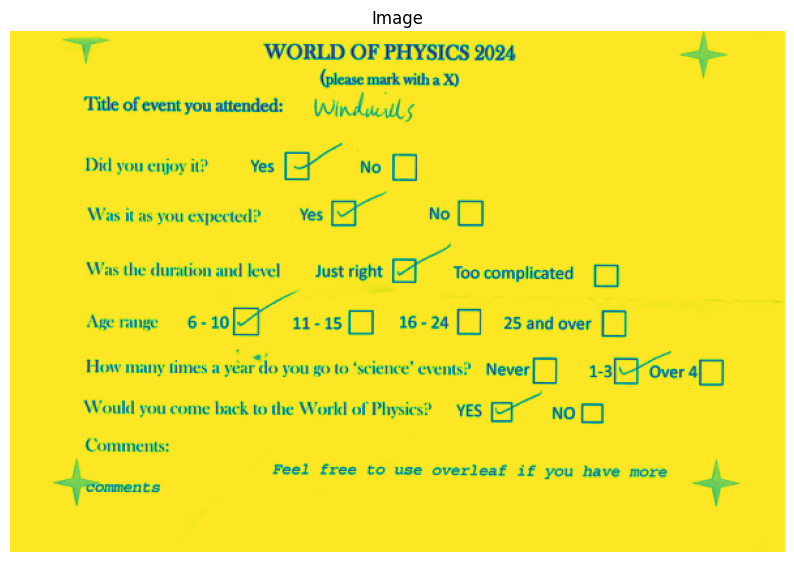

{'stars': {'bottom_right': {'y': 540.75, 'x': 345.0},
  'bottom_left': {'y': 531.0, 'x': 17.0},
  'top_left': {'y': 58.0, 'x': 6.0},
  'top_right': {'y': 51.0, 'x': 345.0}},
 'age': {'x': 215.0, 'y': 56.5, 'h': 16, 'w': 60},
 'enjoy': {'x': 95.5, 'y': 56.0, 'h': 16, 'w': 100},
 'expected': {'x': 135.0, 'y': 59.0, 'h': 15, 'w': 139},
 'overleaf': {'x': 331.0, 'y': 294.0, 'h': 11, 'w': 88},
 'science_events': {'x': 252.0, 'y': 263.0, 'h': 11, 'w': 90},
 'wop': {'x': 9.5, 'y': 195.0, 'h': 12, 'w': 192},
 'title': {'x': 49.5, 'y': 57.0, 'h': 12, 'w': 75},
 '25over': {'x': 218.5, 'y': 378.0, 'h': 11, 'w': 77},
 'over4': {'x': 255.5, 'y': 490.0, 'h': 10, 'w': 41},
 'session': '000',
 'image_seq': '003'}

In [199]:
# Explore skewed image

image, md = read_image_and_metadata("000", "003")
plot_image(image)

md

In [200]:
my_md = md.copy()
my_md.update(**my_md.pop("stars"))
# del my_md['title']
# del my_md['session']

my_md


{'age': {'x': 215.0, 'y': 56.5, 'h': 16, 'w': 60},
 'enjoy': {'x': 95.5, 'y': 56.0, 'h': 16, 'w': 100},
 'expected': {'x': 135.0, 'y': 59.0, 'h': 15, 'w': 139},
 'overleaf': {'x': 331.0, 'y': 294.0, 'h': 11, 'w': 88},
 'science_events': {'x': 252.0, 'y': 263.0, 'h': 11, 'w': 90},
 'wop': {'x': 9.5, 'y': 195.0, 'h': 12, 'w': 192},
 'title': {'x': 49.5, 'y': 57.0, 'h': 12, 'w': 75},
 '25over': {'x': 218.5, 'y': 378.0, 'h': 11, 'w': 77},
 'over4': {'x': 255.5, 'y': 490.0, 'h': 10, 'w': 41},
 'session': '000',
 'image_seq': '003',
 'bottom_right': {'y': 540.75, 'x': 345.0},
 'bottom_left': {'y': 531.0, 'x': 17.0},
 'top_left': {'y': 58.0, 'x': 6.0},
 'top_right': {'y': 51.0, 'x': 345.0}}

In [201]:
target_l = target_locations['left']
target_r = target_locations['right']

sources = []
targets_l = []
targets_r = []
for key in md:
    if key in target_l:
        sources.append(to_coordinate(md[key]))
        targets_l.append(to_coordinate(target_l[key]))
        targets_r.append(to_coordinate(target_r[key]))

sources = np.float32(sources).reshape(-1, 1, 2)
targets_l = np.float32(targets_l).reshape(-1, 1, 2)
targets_r = np.float32(targets_r).reshape(-1, 1, 2)

display(sources)
display(targets_l)
display(targets_r)

array([], shape=(0, 1, 2), dtype=float32)

array([], shape=(0, 1, 2), dtype=float32)

array([], shape=(0, 1, 2), dtype=float32)

In [202]:


def annotate_image(target_image, points: Dict = None):
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
    for pt in points.values():
        if isinstance(pt, dict):
            cv2.circle(target_image, (int(pt['y']), int(pt['x'])), 2, (255,0,0), 2)
    return target_image

HL, _ = cv2.findHomography(sources, targets_l, cv2.RANSAC, 5.0)
HR, _ = cv2.findHomography(sources, targets_r, cv2.RANSAC, 5.0)

display(HL)
display(HR)

error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/calib3d/src/fundam.cpp:390: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'findHomography'


In [ ]:

result_image = cv2.warpPerspective(image, HL, (650, 450))
result_image = annotate_image(image, my_md)

plot_image(result_image)
